dict_keys(['DN_1', 'DN_2', 'DN_3', 'DN_4', 'DN_5', 'DN_full', 'distant', 'l_sites', 'large', 'left_1', 'left_2', 'left_3', 'north', 'right_1', 'right_2', 'right_3'])
DN_full 57.0 km
l_sites 18.0 km
DN_1 28.0 km
DN_2 33.0 km
DN_3 28.0 km
DN_4 30.0 km
DN_5 15.0 km
DN_full 56.0 km
l_sites 18.0 km
DN_1 28.0 km
DN_2 33.0 km
DN_3 28.0 km
DN_4 30.0 km
DN_5 15.0 km


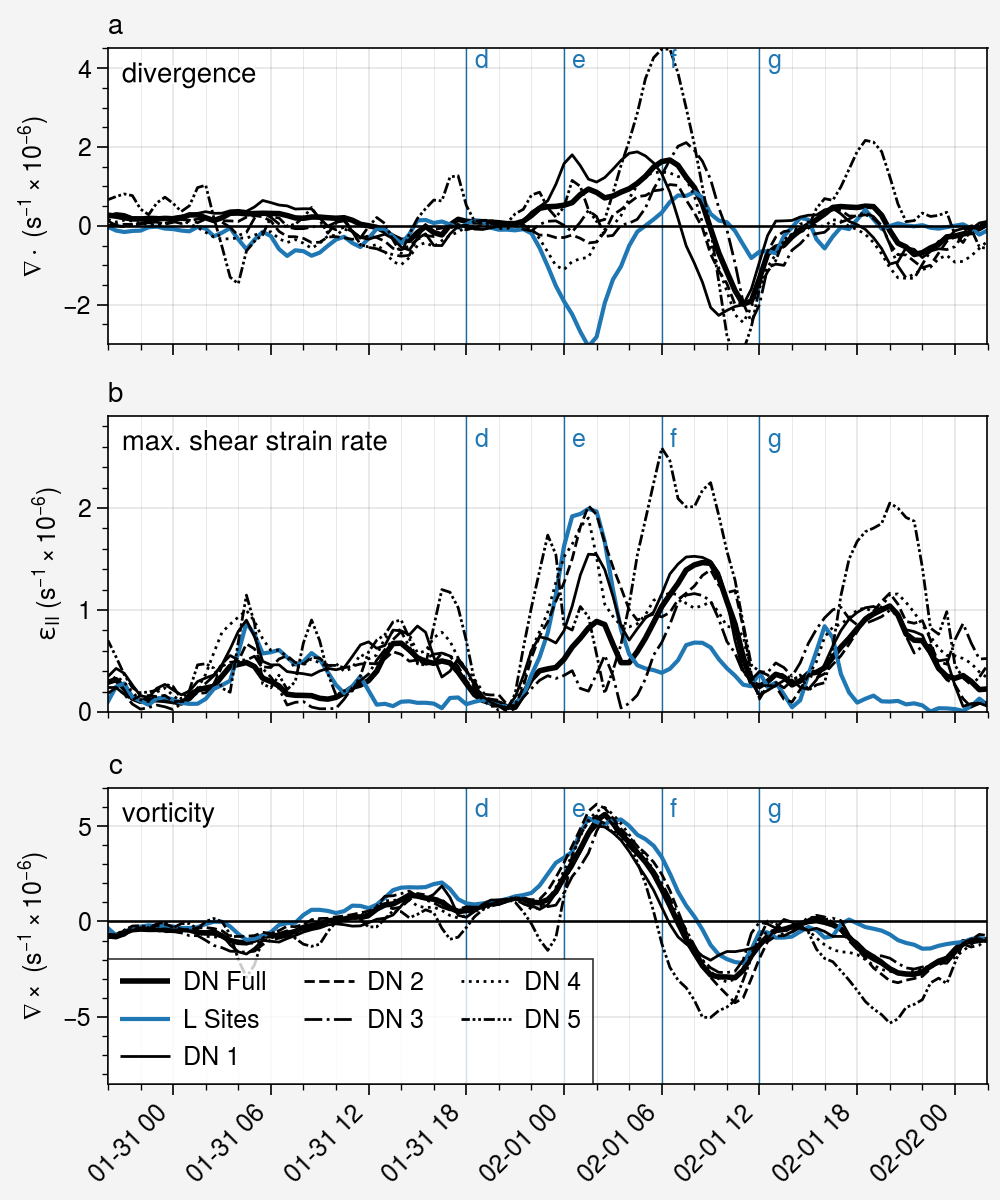

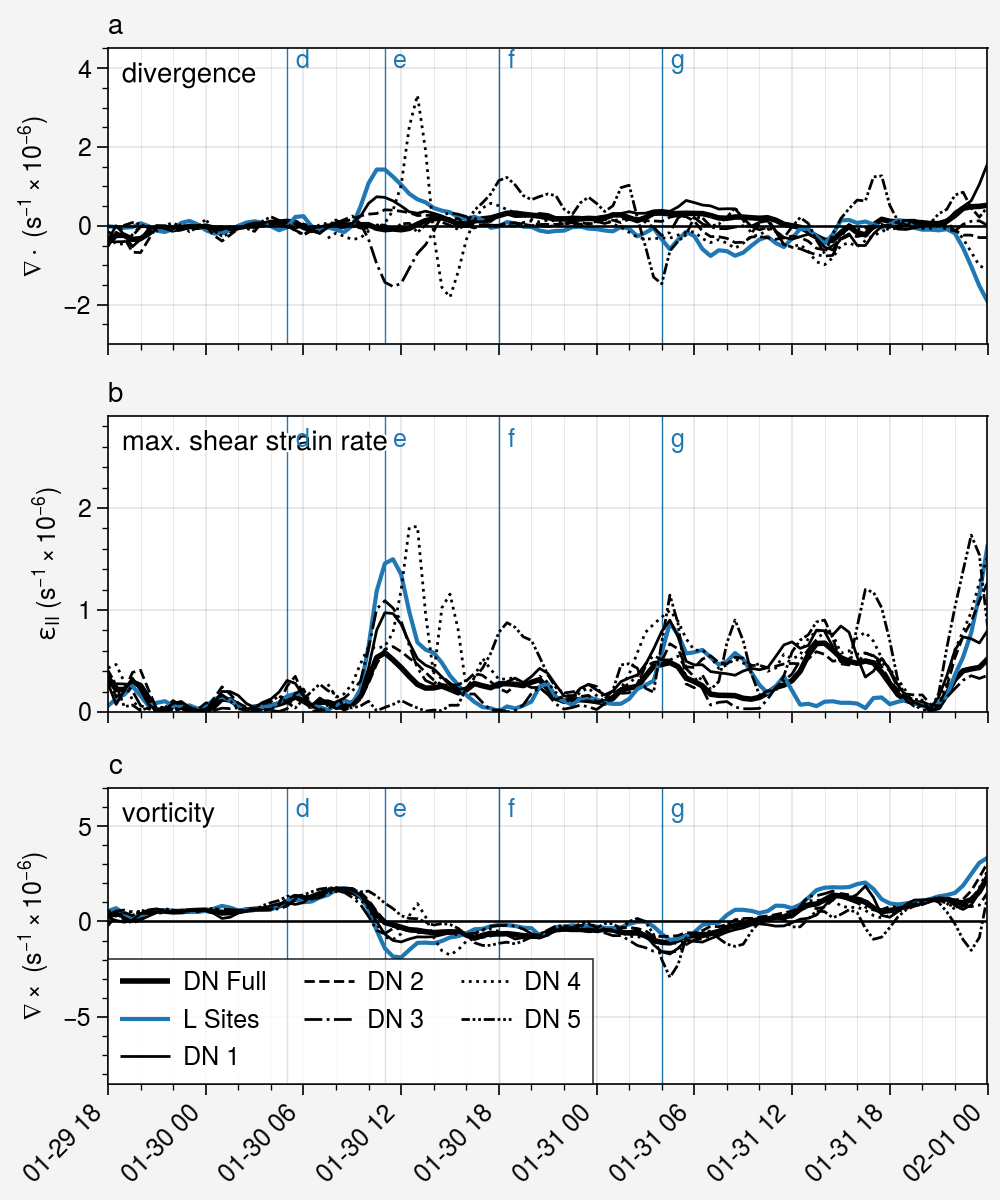

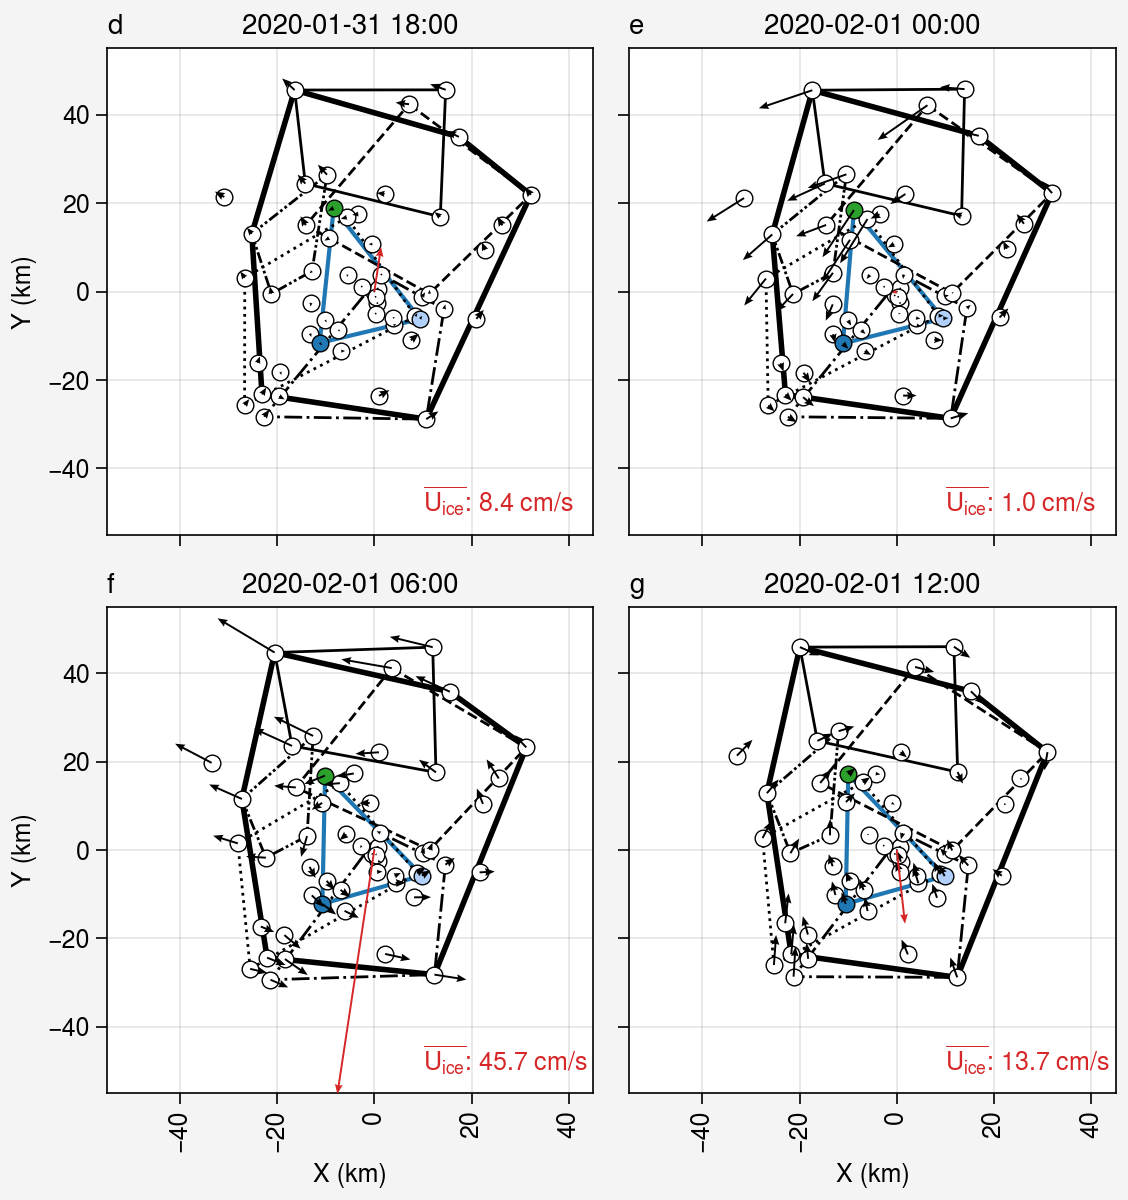

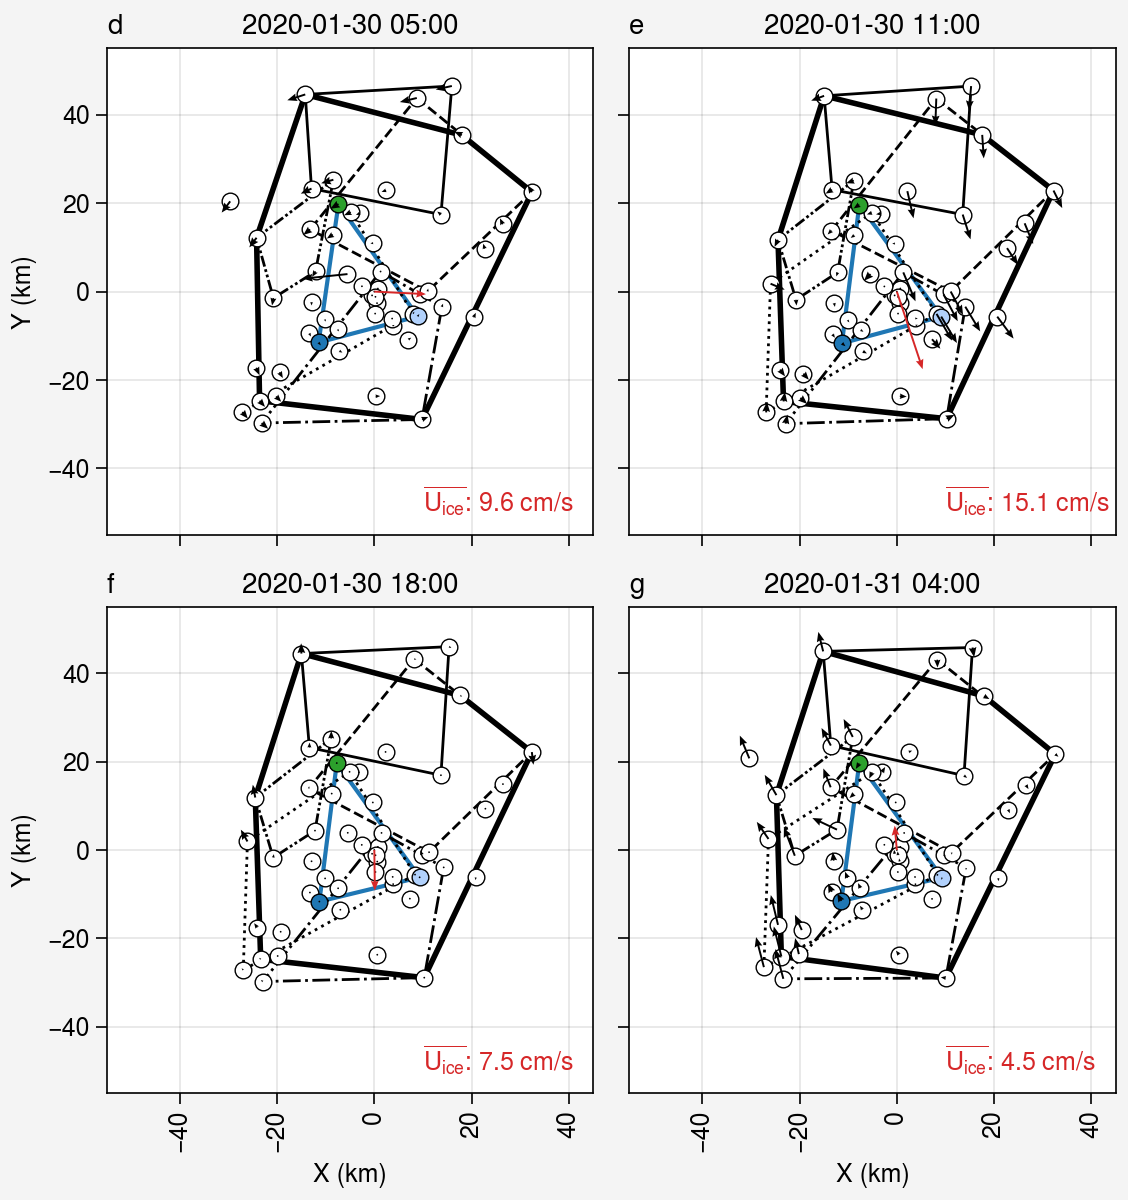

In [6]:
%run ../scripts/plot_deformation.py

In [4]:
initial = strain_rates['l_sites'].copy()

In [1]:
import sys
sys.path.append('../../../../packages/buoy_processing/')
import drifter
import pandas as pd
import proplot as pplt
import numpy as np
import os
import pyproj
from importlib import reload

# Labels are A and B not the same as in Fig 6. A is the second storm and B is the first storm
# Doesn't matter though since A and B aren't in the file names or titles.
dataloc = '../data/interpolated_tracks/'


# These are used for coloring dots on the map
# Smaller groups than the polygons
left = ['2019P128', '2019P184', '2019P182', '2019P127']
right = ['2019P155', '2019P123', '2019P112', '2019P113', '2019P114', '2019P22', '2019P119']
distant = ['2019P156', '2019P157']
l_sites = ['2019T67', '2019T65', '2019S94']
ahead = ['2019P22']
co = ['2019T66']

site_specs = {'2019T67': ('tab:blue', 's', 7),
               '2019T65': ('powder blue', 's', 7),
               '2019S94': ('tab:green', 's', 7),
               '2019T66': ('tab:red', '*', 15)}

buoy_data = {}
for f in os.listdir(dataloc):
    if f[0] != '.':
        dn_id, imei, sensor_id = f.split('.')[0].split('_')
        buoy_data[sensor_id] = pd.read_csv(dataloc + f, parse_dates=True, index_col='datetime')

array_info = pd.read_csv('../data/array_info.csv')
array_info = {array: group.set_index('buoyID') for array, group in array_info.groupby('array_name')}

array_info['DN_5']['line_style'] = [(1, (4, 1, 1, 1, 1, 1))]*len(array_info['DN_5'])
array_info['l_sites']['color'] = 'tab:blue'
array_info['l_sites']['line_width'] = 1.5

In [2]:
drifter = reload(drifter)
from drifter.src.analysis import compute_strain_rate_components

strain_rates = {}
for set_name in array_info:
    print(set_name)
    buoys = array_info[set_name].index[::-1]
    strain_rates[set_name] = drifter.src.analysis.compute_strain_rate_components(buoys,
                                                            buoy_data,
                                                            position_uncertainty=10,
                                                            time_delta='30min')
print(strain_rates.keys())

DN_1
DN_2
DN_3
DN_4
DN_5
DN_full
distant
l_sites
large
left_1
left_2
left_3
north
Reversing order
right_1
right_2
right_3
dict_keys(['DN_1', 'DN_2', 'DN_3', 'DN_4', 'DN_5', 'DN_full', 'distant', 'l_sites', 'large', 'left_1', 'left_2', 'left_3', 'north', 'right_1', 'right_2', 'right_3'])


In [17]:
buoys = list(array_info['DN_full'].index[::-1])
result = drifter.src.analysis.compute_strain_rate_components(buoys,
                                                    buoy_data,
                                                    position_uncertainty=10,
                                                    time_delta='30min')

In [22]:
print(result.area['2020-01-26 00:00']/1e6, result.area.max()/1e6, result.area[-2]/1e6)

3171.844414390264 3320.269376468794 3208.8294631390554


In [30]:
result.area['2020-02-01 09:00']/result.area['2020-02-01 00:00']*100

103.54147867528934

In [43]:
ts = slice('2020-01-26 00:00', '2020-02-05 00:00')
for set_name in strain_rates:
    df = strain_rates[set_name].dropna(subset='area')
    init = df.area.values[0]
    end = df.area.values[-1]
    print(set_name, np.round((end/init)*100-100), df.area.index[0], df.area.index[-1])

DN_1 -1.0 2020-01-25 00:30:00 2020-02-04 23:30:00
DN_2 -5.0 2020-01-25 00:30:00 2020-02-04 10:30:00
DN_3 -7.0 2020-01-25 00:30:00 2020-02-04 23:30:00
DN_4 -10.0 2020-01-25 01:30:00 2020-02-04 22:30:00
DN_5 15.0 2020-01-25 00:30:00 2020-02-04 23:00:00
DN_full 2.0 2020-01-25 00:30:00 2020-02-04 23:30:00
distant -4.0 2020-01-25 00:00:00 2020-02-05 00:00:00
l_sites -9.0 2020-01-25 00:30:00 2020-02-04 23:00:00
large 1.0 2020-01-25 00:30:00 2020-02-04 23:30:00
left_1 8.0 2020-01-25 00:30:00 2020-02-04 23:30:00
left_2 13.0 2020-01-25 00:30:00 2020-02-04 23:30:00
left_3 17.0 2020-01-25 00:30:00 2020-02-04 23:30:00
north 3.0 2020-01-25 00:30:00 2020-02-04 23:30:00
right_1 0.0 2020-01-25 00:30:00 2020-02-04 23:30:00
right_2 -5.0 2020-01-25 00:00:00 2020-02-05 00:00:00
right_3 -5.0 2020-01-25 19:30:00 2020-02-04 12:30:00


In [41]:
set_name = 'DN_full'
df = strain_rates[set_name].dropna(subset='area')
init = df.area.values[0]
end = df.area.values[-1]

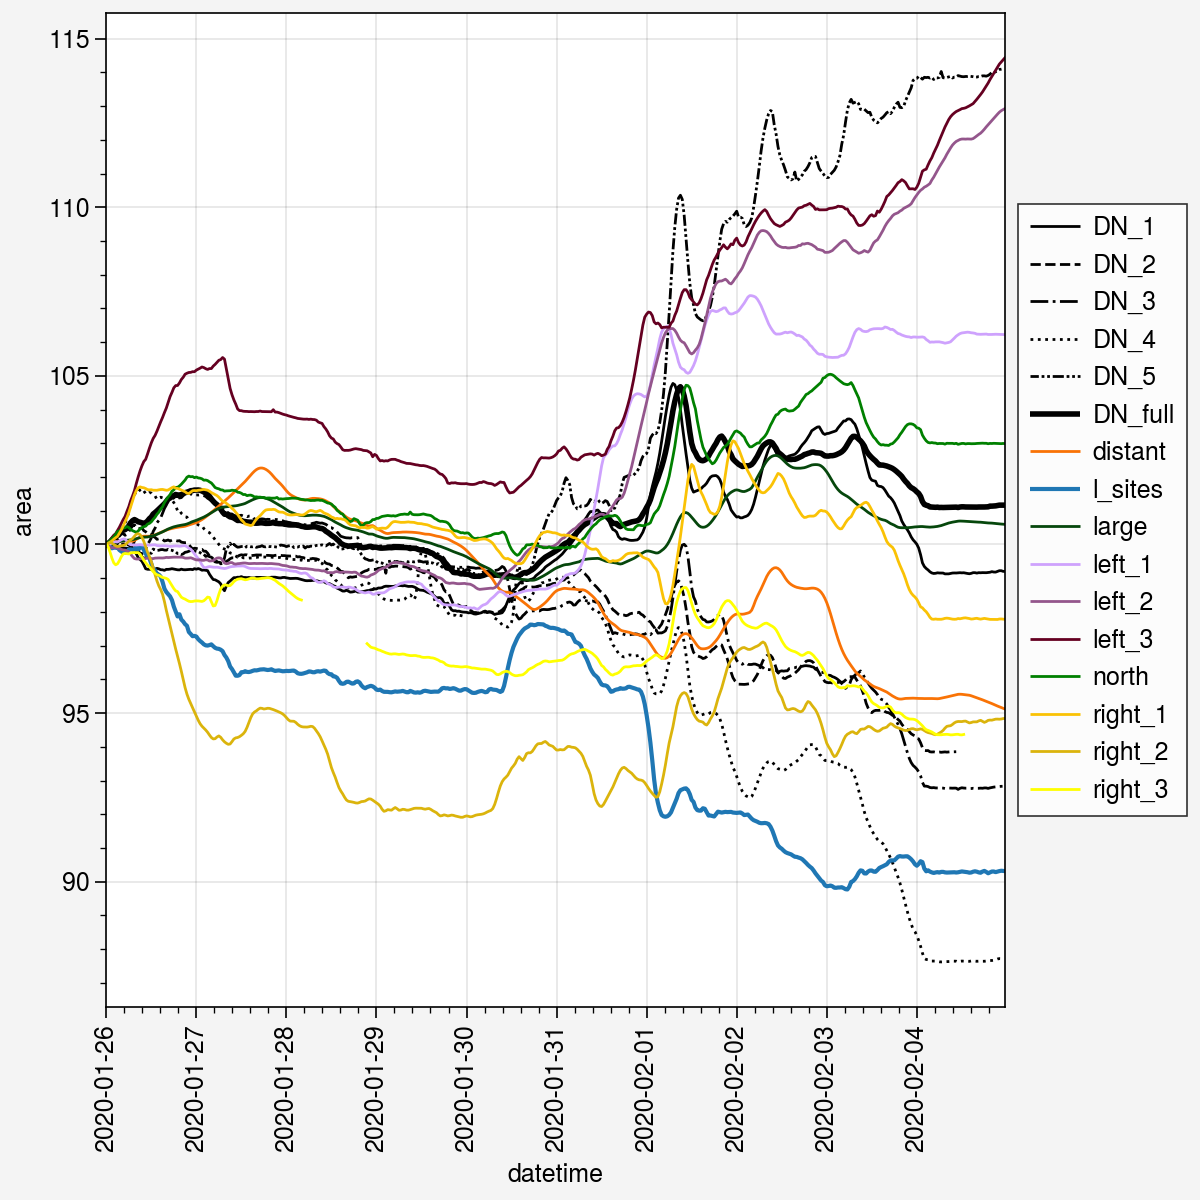

In [47]:
fig, ax = pplt.subplots(width=6, height=6)
for set_name in strain_rates:
    buoy_set = list(array_info[set_name].index)
    ls = array_info[set_name].line_style.values[0]
    c = array_info[set_name].color.values[0]
    lw = array_info[set_name].line_width.values[0]
    result = strain_rates[set_name].loc[ts]    
    ax.plot(result.area / result.area['2020-01-26 00:00'] * 100, color=c, lw=lw, ls=ls, label=set_name)
ax.legend(loc='r', ncols=1)

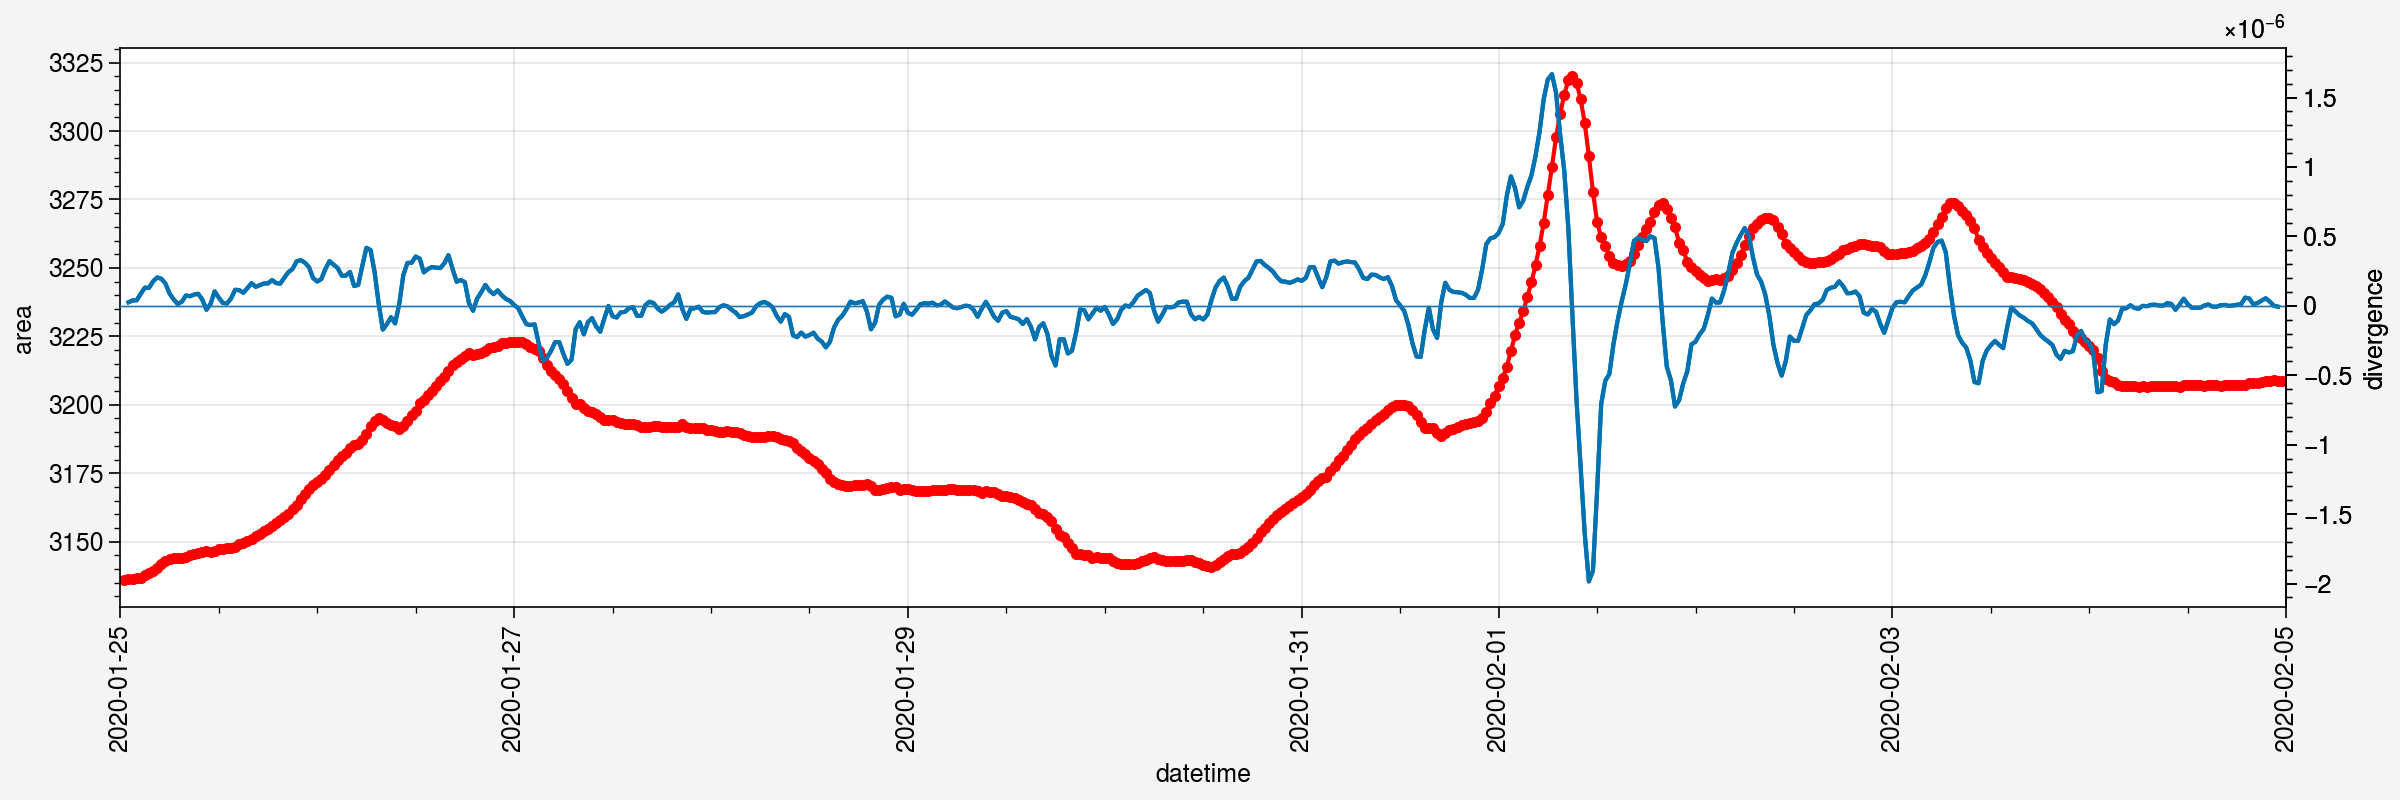

In [5]:
site = 'DN_full'
fig, ax = pplt.subplots(width=12, height=4)
ax.plot(
    x=strain_rates[site].index,
    y=strain_rates[site]['area']/1e6,
    shadedata=strain_rates[site]['uncertainty_area']/1e6, color='r', marker='.')
ax2=ax.twinx()
ax2.plot(
    x=strain_rates[site].index,
    y=strain_rates[site]['divergence'],
    shadedata=strain_rates[site]['uncertainty_divergence'])
ax2.axhline(0, color='tab:blue', lw=0.5)
ax.format(yreverse=False)
ax2.format(yreverse=False)

<AxesSubplot:xlabel='datetime'>

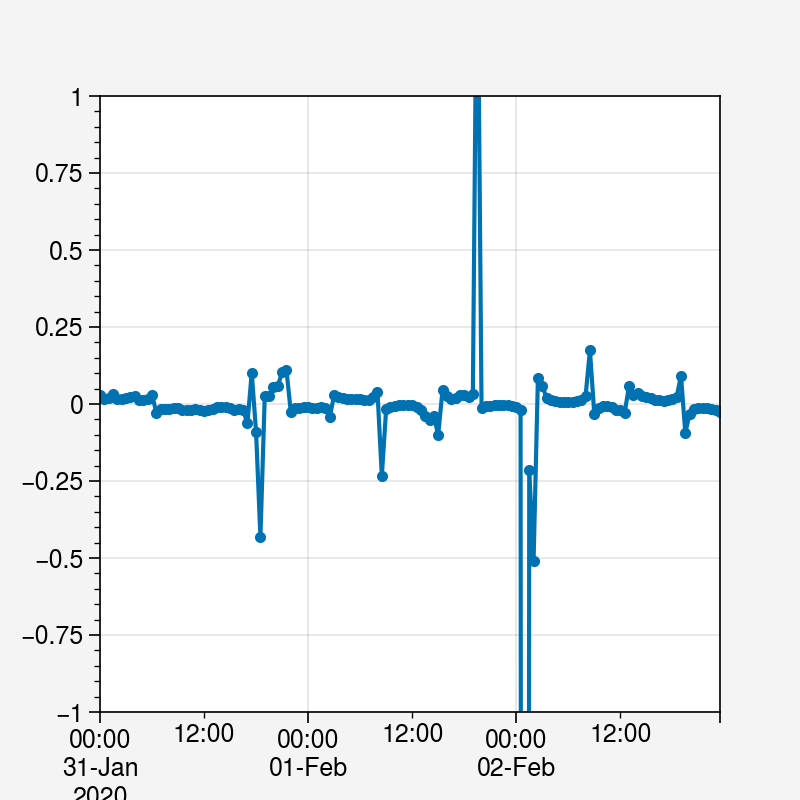

In [10]:
(data['uncertainty_divergence']/data['divergence']).plot(marker='.', ylim=(-1, 1))

8.03895819202418e-08

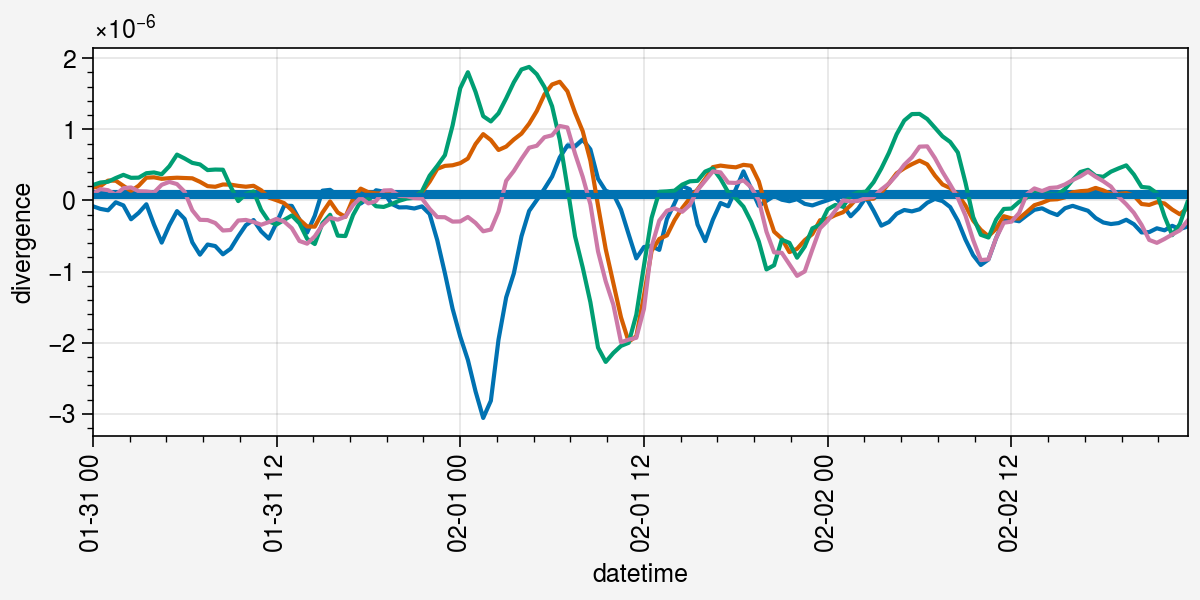

In [16]:
ts = slice('2020-01-31', '2020-02-02')
fig, ax = pplt.subplots(width=6, height=3)
for site in ['l_sites', 'DN_full', 'DN_1', 'DN_2']:
    data = strain_rates[site].loc[ts]    
    ax.plot(
        x=data.index,
        y=data['divergence'],
        shadedata=data['uncertainty_divergence'])
    if np.any(data['shape_flag'] > 1):
        print(site)
    rel_unc = np.abs(data['uncertainty_divergence']/data['divergence'])
    ax.axhline(np.abs(data['divergence'][rel_unc < 0.05]).min(),)

In [ ]:
ts = slice('2020-01-31', '2020-02-02')
fig, ax = pplt.subplots(width=6, height=3)
for site in ['l_sites', 'DN_full', 'DN_1', 'DN_2']:
    data = strain_rates[site].loc[ts]    
    ax.plot(
        x=data.index,
        y=data['divergence'],
        shadedata=data['uncertainty_divergence']*10)

In [7]:
for site in l_sites:
    print(site, np.mean(np.sqrt((df_x[site] - df_x['2019T66'])**2 + (df_y[site] - df_y['2019T66'])**2)))


2019T67 16.175041957447544
2019T65 11.118009012533784
2019S94 20.61305221676658


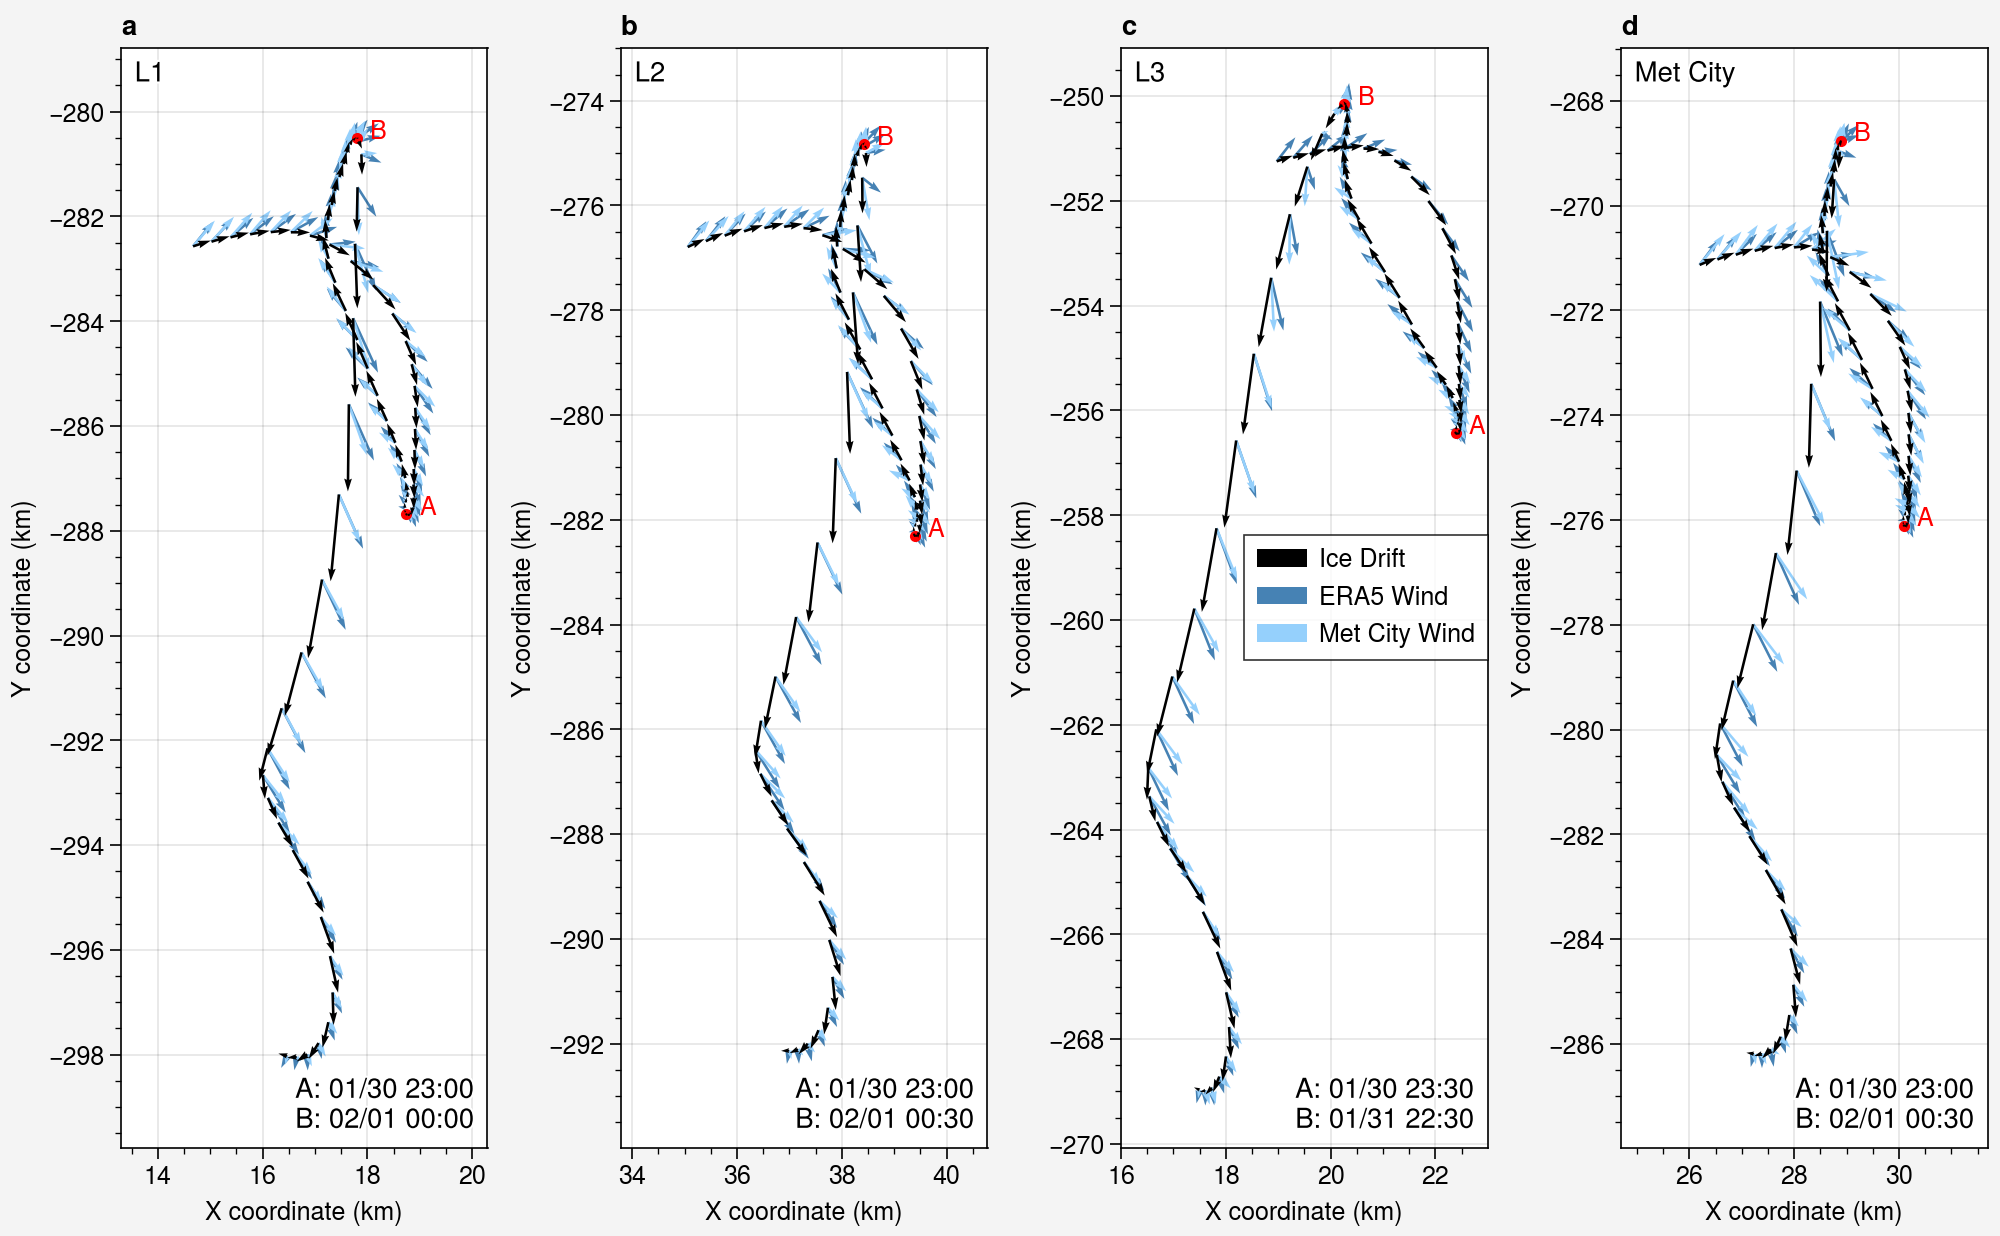

In [9]:
%run ../scripts/plot_Lsite_tracks.py

In [21]:
ts1 = slice('2020-01-31 12:00', '2020-01-31 15:00')
for l_data in [df_l1, df_l2, df_l3]:
    u = l_data.loc[ts1, 'wspd_u_mean']
    v = l_data.loc[ts1, 'wspd_v_mean']
    print(np.round(np.sqrt(u**2 + v**2).mean()), 
          np.round(np.sqrt(u**2 + v**2).min()), 
          np.round(np.sqrt(u**2 + v**2).max()))

7.0 6.0 9.0
8.0 6.0 9.0
7.0 6.0 8.0


In [5]:
buoys = ['2019T67', '2019T65', '2019S94']
data = buoy_data
time_delta = '30min'
buoys = list(array_info['DN_full'].index)

Calculating uncertainty in deformation.

In [6]:
def check_shape(buoys, date, data):
    """Pass through. Return True if the shape is too skewed."""
    return False

def polygon_area(X, Y):
    """Compute area of polygon as a sum. Should use LAEA not PS here"""
    s2 = 0.
    N = len(X)
    s1 = X[N-1]*Y[0] - X[0]*Y[N-1]
    for i in range(N - 1):
        s2 += X[i]*Y[i+1] - Y[i]*X[i+1]
    return (s2 + s1)*0.5

def polygon_area_uncertainty(X, Y, position_uncertainty):
    """Compute the area uncertainty following Dierking et al. 2020"""
    N = len(X)
    S = 0
    for i in range(N):
        # the modulus here makes the calculation wrap around to the beginning
        # could adjust the other codes to do this too
        S += (X[(i+1) % N] - X[(i-1) % N])**2 +  (Y[(i+1) % N] - Y[(i-1) % N])**2
    return np.sqrt(0.25*position_uncertainty**2*S)

def gradvel_uncertainty(X, Y, U, V, A, position_uncertainty, time_delta, vel_var='u', x_var='x'):
    """Equation 19 from Dierking et al. 2020 assuming uncertainty in position is same in both x and y.
    Also assuming that there is no uncertainty in time. Default returns standard deviation
    uncertainty for dudx.
    """
    sigma_A = polygon_area_uncertainty(X, Y, position_uncertainty)
    sigma_X = position_uncertainty

    # velocity uncertainty
    if vel_var=='u':
        u = U.copy()
    else:
        u = V.copy()
    if x_var == 'x':
        # If you want dudx, integrate over Y
        x = Y.copy()
    else:
        x = X.copy()

    sigma_U = 2*sigma_X**2/time_delta**2


    N = len(X)
    S1, S2, S3 = 0, 0, 0
    for i in range(N):
        # the modulus here makes the calculation wrap around to the beginning
        # could adjust the other codes to do this too
        S1 += (u[(i+1) % N] + u[(i-1) % N])**2 * (x[(i+1) % N] - x[(i-1) % N])**2
        S2 += (x[(i+1) % N] - x[(i-1) % N])**2
        S3 += (u[(i+1) % N] + u[(i-1) % N])**2
    var_ux = sigma_A**2/(4*A**4)*S1 + \
             sigma_U**2/(4*A**2)*S2 + \
             sigma_X**2/(4*A**2)*S3

    return np.sqrt(var_ux)


def accel(X, U, A, sign):
    """Computes spatial derivative of velocity for 
    deformation."""
    N = len(X)
    sumvar = 0
    s1 = (U[0] + U[N-1])*(X[0] - X[N-1])
    for i in range(N - 1):
        sumvar += (U[i+1] + U[i])*(X[i+1] - X[i])
    return 1/(2*A) * (sumvar + s1) * sign

lon_data = pd.DataFrame({b: data[b]['longitude'] for b in buoys})
lat_data = pd.DataFrame({b: data[b]['latitude'] for b in buoys})
U_data = pd.DataFrame({b: data[b]['u'] for b in buoys})
V_data = pd.DataFrame({b: data[b]['v'] for b in buoys})
time_delta = pd.to_timedelta(time_delta).total_seconds()

# Polar stereographic for velocity-based component
projIn = 'epsg:4326' # WGS 84 Ellipsoid
projOut = 'epsg:3413' # NSIDC North Polar Stereographic
transformer_ps = pyproj.Transformer.from_crs(projIn, projOut, always_xy=True)

projOut = 'epsg:6931' # NSIDC EASE 2.0 (for area calculation)
transformer_laea = pyproj.Transformer.from_crs(projIn, projOut, always_xy=True)

X_data = U_data * np.nan
Y_data = U_data * np.nan
XA_data = U_data * np.nan
YA_data = U_data * np.nan

In [7]:
for buoy in X_data.columns:
    lon = lon_data[buoy].values
    lat = lat_data[buoy].values

    x, y = transformer_ps.transform(lon, lat)
    X_data[buoy] = x
    Y_data[buoy] = y

    x, y = transformer_laea.transform(lon, lat)
    XA_data[buoy] = x
    YA_data[buoy] = y

In [30]:
position_uncertainty = 10
X = X_data.T.values
Y = Y_data.T.values
XA = XA_data.T.values
YA = YA_data.T.values
U = U_data.T.values
V = V_data.T.values

A = polygon_area(XA, YA)

if np.all(A[~np.isnan(A)] < 0):
    print('Reversing order')
    X = X[::-1,:]
    XA = XA[::-1,:]
    Y = Y[::-1,:]
    YA = YA[::-1,:]
    U = U[::-1,:]
    V = V[::-1,:]    
A = polygon_area(XA, YA)

dudx = accel(Y, U, A, 1)
dudy = accel(X, U, A, -1)
dvdx = accel(Y, V, A, 1)
dvdy = accel(X, V, A, -1)

divergence = dudx + dvdy
vorticity = dvdx - dudy
pure_shear = dudy + dvdx
normal_shear = dudx - dvdy
maximum_shear_strain_rate = np.sqrt(pure_shear**2 + normal_shear**2)
total_deformation = np.sqrt(divergence**2 + maximum_shear_strain_rate**2)


sigma_A = polygon_area_uncertainty(X, Y, position_uncertainty)
sigma_dudx = gradvel_uncertainty(X, Y, U, V, A, position_uncertainty, time_delta, vel_var='u', x_var='x')
sigma_dvdx = gradvel_uncertainty(X, Y, U, V, A, position_uncertainty, time_delta, vel_var='v', x_var='x')
sigma_dudy = gradvel_uncertainty(X, Y, U, V, A, position_uncertainty, time_delta, vel_var='u', x_var='y')
sigma_dvdy = gradvel_uncertainty(X, Y, U, V, A, position_uncertainty, time_delta, vel_var='v', x_var='y')

sigma_div = np.sqrt(sigma_dudx**2 + sigma_dvdy**2)
sigma_vrt = np.sqrt(sigma_dvdx**2 + sigma_dudy**2)
sigma_shr = np.sqrt((normal_shear/maximum_shear_strain_rate)**2 * (sigma_dudx**2 + sigma_dvdy**2) + \
                    (pure_shear/maximum_shear_strain_rate)**2 * (sigma_dudy**2 + sigma_dvdx**2))
sigma_tot = np.sqrt((maximum_shear_strain_rate/total_deformation)**2 * sigma_shr**2 + \
                    (divergence/total_deformation)**2 * sigma_vrt**2)

Reversing order


In [31]:
polygon_area(XA[::-1,:], YA[::-1,:])

array([            nan, -3.13607618e+09, -3.13618124e+09, -3.13638305e+09,
       -3.13664478e+09, -3.13685862e+09, -3.13768923e+09, -3.13842731e+09,
       -3.13923467e+09, -3.14054528e+09, -3.14169097e+09, -3.14288282e+09,
       -3.14362624e+09, -3.14395452e+09, -3.14418475e+09, -3.14411852e+09,
       -3.14453200e+09, -3.14501210e+09, -3.14536046e+09, -3.14598869e+09,
       -3.14640160e+09, -3.14652010e+09, -3.14605997e+09, -3.14667674e+09,
       -3.14730828e+09, -3.14739132e+09, -3.14756390e+09, -3.14759192e+09,
       -3.14819294e+09, -3.14898130e+09, -3.14954979e+09, -3.15010864e+09,
       -3.15108516e+09, -3.15207487e+09, -3.15272719e+09, -3.15386897e+09,
       -3.15466803e+09, -3.15581484e+09, -3.15691382e+09, -3.15779105e+09,
       -3.15884351e+09, -3.16024381e+09, -3.16177507e+09, -3.16345229e+09,
       -3.16565204e+09, -3.16743577e+09, -3.16941731e+09, -3.17081417e+09,
       -3.17184441e+09, -3.17293870e+09, -3.17417773e+09, -3.17615951e+09,
       -3.17808679e+09, -

<a list of 1 Line2D objects>

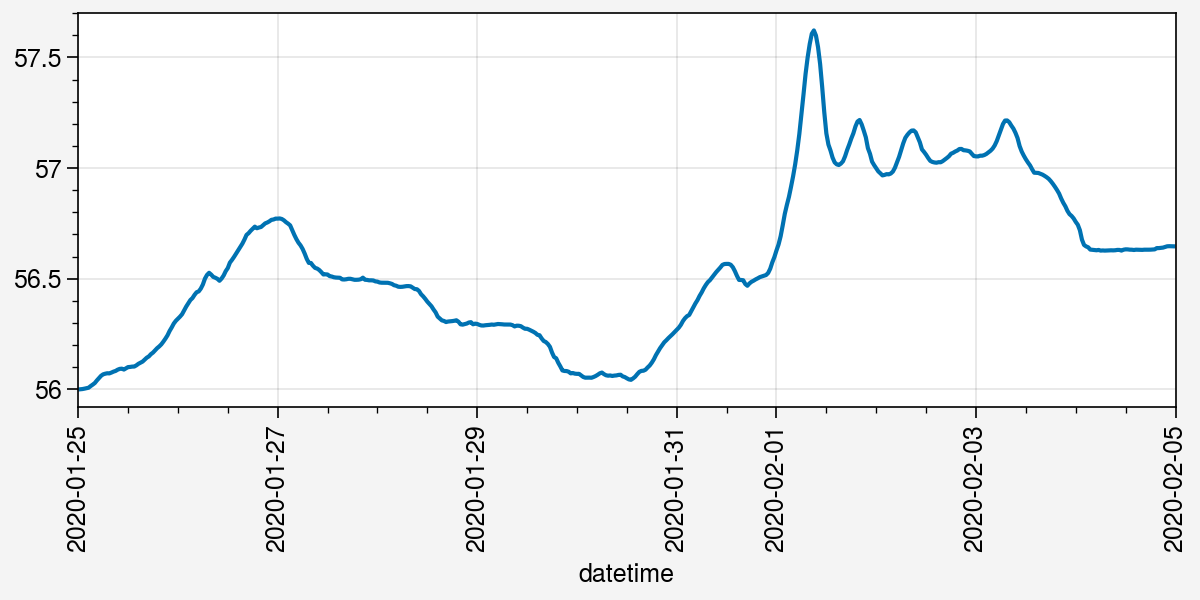

In [32]:
fig, ax = pplt.subplots(width=6, height=3)
# ax.plot(pd.Series(pure_shear, index=U_data.index))
ax.plot(pd.Series(np.sqrt(A/1e6), index=U_data.index))



<a list of 1 Line2D objects>

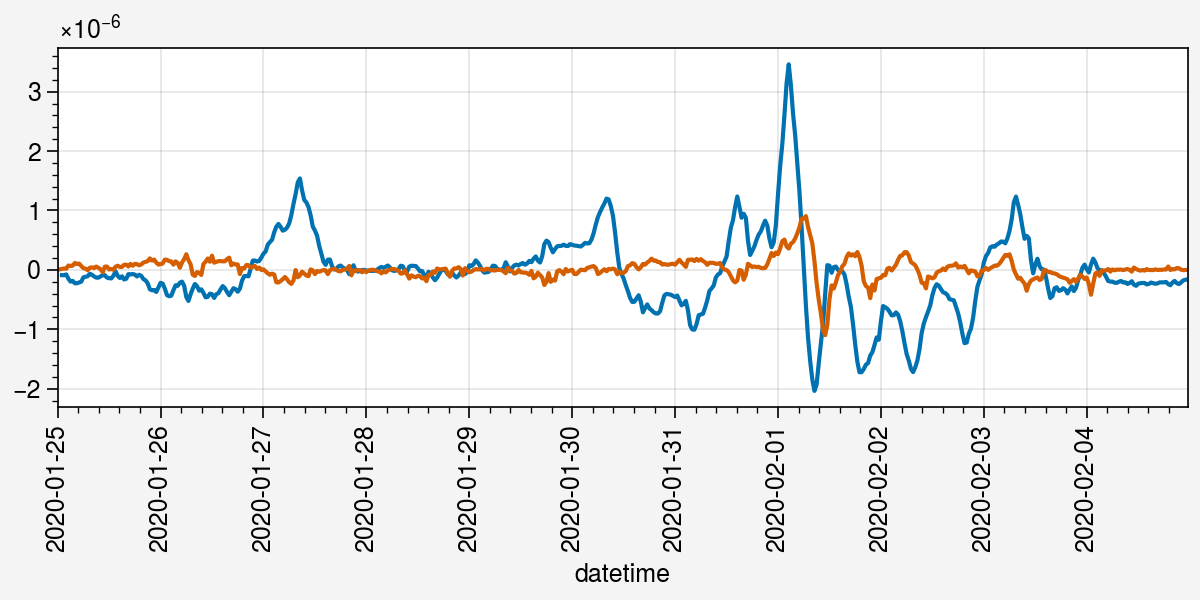

In [11]:
fig, ax = pplt.subplots(width=6, height=3)
# ax.plot(pd.Series(pure_shear, index=U_data.index))
ax.plot(pd.Series(divergence, index=U_data.index))
ax.plot(pd.Series((A[1:] - A[:-1])/(2*time_delta)/A[:-1], index=U_data.index[:-1]))


There's a sign error somewhere - the divergence doesn't match the area calculation.

<a list of 1 Line2D objects>

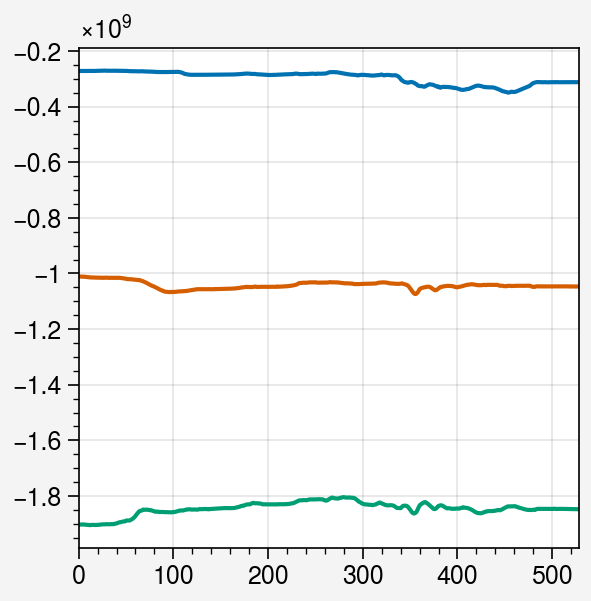

In [157]:
# orientation
def det(X, Y, idx):
    """Computes the determinant of the orientation matrix
    (https://en.wikipedia.org/wiki/Curve_orientation#Orientation_of_a_simple_polygon)
    Positive determinant means counterclockwise, negative is clockwise. 
    We want it to be counterclockwise.
    """
    N = len(X)
    idx0 = (idx - 1) % N
    idx1 = idx
    idx2 = (idx + 1) % N
    return (X[idx1] - X[idx0])*(Y[idx2] - Y[idx0]) - \
                (X[idx2]-X[idx0])*(Y[idx1] - Y[idx0])
fig, ax = pplt.subplots()
ax.plot(det(X, Y, 0))
ax.plot(det(X, Y, 1))
ax.plot(det(X, Y, 2))